In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import io
import pandas as pd


import nltk
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords

import re



In [3]:
df = pd.read_csv("/content/drive/MyDrive/information retrieval/data.csv", parse_dates=['date'], dayfirst=False)

In [4]:
df

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,tweet,language,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,video,thumbnail,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1355667091739697152,1355652115755118593,2021-01-31 07:59:56 Malay Peninsula Standard Time,2021-01-31,07:59:56,800,121649904,jtfinch,Irish Padre,NaN,"@BreitbartNews Fixed the headline for you, ""Wi...",en,[],[],[],2,0,0,[],[],https://twitter.com/jtfinch/status/13556670917...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'BreitbartNews', 'name': 'Bre...",NaN,NaN,NaN,NaN
1,1355667078813016065,1355667078813016065,2021-01-31 07:59:53 Malay Peninsula Standard Time,2021-01-31,07:59:53,800,763734175539204096,draconiclogic,"❄️ winter beast 🌨️ sick, slow responses",NaN,if you think autism is worse than covid and fa...,en,[],[],[],1,1,6,[],[],https://twitter.com/DraconicLogic/status/13556...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1355667077777010691,1355667077777010691,2021-01-31 07:59:53 Malay Peninsula Standard Time,2021-01-31,07:59:53,800,77581957,lareds60,lareds,NaN,Casino Mogul Charged After Getting COVID-19 Va...,en,"[{'screen_name': 'yahoo', 'name': 'yahoo', 'id...",['https://www.yahoo.com/huffpost/rodney-ekater...,[],0,0,0,[],[],https://twitter.com/lareds60/status/1355667077...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,1355667072726958080,1355610914112692226,2021-01-31 07:59:51 Malay Peninsula Standard Time,2021-01-31,07:59:51,800,824370398682902529,coskidiva,Itakepictures,NaN,"@yashar Also, if Covid is allowed to run unche...",en,[],[],[],0,0,1,[],[],https://twitter.com/COskidiva/status/135566707...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'yashar', 'name': 'Yashar Ali...",NaN,NaN,NaN,NaN
4,1355667065764524035,1355667065764524035,2021-01-31 07:59:50 Malay Peninsula Standard Time,2021-01-31,07:59:50,800,1308386651303849984,buzz_tic,Tic Tech Buzz,NaN,A good COVID-19 vaccine is good enough https...,en,[],['https://tictechbuzz.com/a-good-covid-19-vacc...,[],0,0,0,[],[],https://twitter.com/buzz_tic/status/1355667065...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14572,1354948349250691072,1354944112160608257,2021-01-29 08:23:54 Malay Peninsula Standard Time,2021-01-29,08:23:54,800,2369449952,profhalloran,John Halloran,NaN,"@poetgambler @Tyaki @Vote_For_Aaron My, dude, ...",en,[],[],[],1,0,2,[],[],https://twitter.com/ProfHalloran/status/135494...,False,NaN,0,NaN,NaN,"42.897541,-82.7059659,1000km",NaN,NaN,NaN,NaN,"[{'screen_name': 'poetgambler', 'name': 'Zoidy...",NaN,NaN,NaN,NaN
14573,1354948210326962178,1354948210326962178,2021-01-29 08:23:21 Malay Peninsula Standard Time,2021-01-29,08:23:21,800,67610400,jasonfarleyjhu,"Jason Farley, Ph.D., MPH, NP, FAAN, FAANP 🏳️‍🌈",NaN,Number 1 rule is “nothing gets wasted”. Well ...,en,"[{'screen_name': 'jhunursing', 'name': 'hopkin...",[],[],0,1,6,"['covid', 'vaccine']",[],https://twitter.com/jasonfarleyJHU/status/1354...,False,https://twitter.com/nytimes/status/13547687105...,0,NaN,NaN,"42.897541,-82.7059659,1000km",NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
14574,1354947805773762568,1354947805773762568,2021-01-29 08:21:45 Malay Peninsula Standard Time,2021-01-29,08:21:45,800,1194731336302563329,ihatetrump4ever,Vorian Atreides,NaN,What superpower do you think you'll get as a s...,en,[],[],[],1,0,1,[],[],https://twitter.com/iHaTeTrUmP4eVeR/status/135...,False,NaN,0,NaN,NaN,"42.897541,-82.7059659,1000km",NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
14575,1354946558991675396,1354946558991675396,2021-01-29 08:16:48 Malay Peninsula Standard Time,2021-01-29,08:16:48,800,30477673,gccanada,Gospel Connection Canada,"{'type': 'Point', 'coordinates': [43.648, -79....",ARTIST In order for y

In [5]:
tweet_df = df['tweet']

In [6]:
tweet_df

0        @BreitbartNews Fixed the headline for you, "Wi...
1        if you think autism is worse than covid and fa...
2        Casino Mogul Charged After Getting COVID-19 Va...
3        @yashar Also, if Covid is allowed to run unche...
4        A good COVID-19 vaccine is good enough   https...
                               ...                        
14572    @poetgambler @Tyaki @Vote_For_Aaron My, dude, ...
14573    Number 1 rule is “nothing gets wasted”.  Well ...
14574    What superpower do you think you'll get as a s...
14575    ARTIST In order for you to travel for ministry...
14576    Hey friends. Did you know you can help your pa...
Name: tweet, Length: 14577, dtype: object

In [8]:
def cleaner(tweet):
    
    # remove urls
    tweet = re.sub(r'http\S+', ' ', tweet)
    
    # remove html tags
    tweet = re.sub(r'<.*?>',' ', tweet)
    
    # remove digits
    tweet = re.sub(r'\d+',' ', tweet)
    
    # remove hashtags
    tweet = re.sub(r'#\w+',' ', tweet)
    
    # remove mentions
    tweet = re.sub(r'@\w+',' ', tweet)

    #remove emoji
    emoji_pattern = re.compile("["
    u"\U0001F600-\U0001F64F"  # emoticons
    u"\U0001F300-\U0001F5FF"  # symbols & pictographs
    u"\U0001F680-\U0001F6FF"  # transport & map symbols
    u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
    tweet = emoji_pattern.sub(r'', tweet)
    
    #removing stop words
    tweet = tweet.split()
    tweet = " ".join([word for word in tweet if not word in stop_words])


    
    return  tweet

In [9]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [10]:


stop_words = stopwords.words('english')
clean_tweet =tweet_df.apply(lambda x:x.lower())
clean_tweet =clean_tweet.apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
clean_tweet =clean_tweet.apply(cleaner)
clean_tweet.head()



0    fixed headline you, "with availability vaccine...
1    think autism worse covid falsely believe covid...
2    casino mogul charged getting covid- vaccine me...
3    also, covid allowed unchecked mutate &amp; mut...
4                      good covid- vaccine good enough
Name: tweet, dtype: object

In [11]:
clean_tweet

0        fixed headline you, "with availability vaccine...
1        think autism worse covid falsely believe covid...
2        casino mogul charged getting covid- vaccine me...
3        also, covid allowed unchecked mutate &amp; mut...
4                          good covid- vaccine good enough
                               ...                        
14572    dude, would give anything feed point. nine day...
14573    number rule “nothing gets wasted”. well done q...
14574          superpower think side effect covid vaccine?
14575    artist order travel ministry, must take covid-...
14576    friends. know help parents register covid vacc...
Name: tweet, Length: 14577, dtype: object

In [12]:
import wordcloud


import seaborn as sns
import matplotlib.pyplot as plt



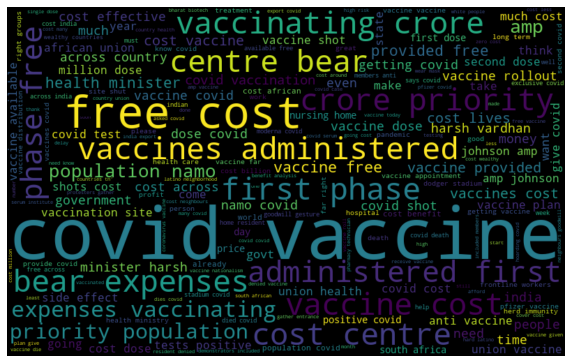

In [13]:
all_words = ' '.join([text for text in clean_tweet])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [14]:
clean_tweet.to_csv("/content/drive/MyDrive/information retrieval/cleantweet.csv",index=False)

In [ ]:
hyper parameters
EPOCHS = 2
BATCH_SIZE = 32
embedding_dim = 16
units = 256

model = tf.keras.Sequential([
    Layers.Embedding(vocab_size, embedding_dim, input_length=X.shape[1]),
    Layers.Bidirectional(Layers.LSTM(units,return_sequences=True)),
    Layers.GlobalMaxPool1D(),
    Layers.Dropout(0.4),
    Layers.Dense(64, activation="relu"),
    Layers.Dropout(0.4),
    Layers.Dense(3)
])


model.compile(loss=SparseCategoricalCrossentropy(from_logits=True),
              optimizer='adam',metrics=['accuracy']
             )

model.summary()